In [1]:
#Importing Libraries
import gradio as gr
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
# Load dataset
dataset = pd.read_csv(r"C:\Users\sshiv\OneDrive\Desktop\Bhavana\C\minipro\IMDB Dataset.csv.zip")
dataset.sentiment.replace('positive', 1, inplace=True)
dataset.sentiment.replace('negative', 0, inplace=True)


In [3]:
# Define functions for data cleaning
def clean_text(text):
    cleaned = re.compile(r'<.*?>')
    text = re.sub(cleaned, '', text)  # Remove HTML tags
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [w for w in words if w not in stop_words]  # Remove stopwords
    ss = SnowballStemmer('english')
    text = " ".join([ss.stem(w) for w in words])  # Stemming
    return text

# Apply data cleaning to the dataset
dataset['cleaned_review'] = dataset['review'].apply(clean_text)

In [4]:
# Create Bag of Words (BOW) using CountVectorizer
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(dataset['cleaned_review']).toarray()
y = dataset['sentiment'].values

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [6]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=9)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.4f}")
# Generate classification report for Decision Tree
dt_report = classification_report(y_test, dt_pred)
print(f"\nClassification Report - Decision Tree:\n{dt_report}")

Decision Tree Classifier Accuracy: 0.7282

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5023
           1       0.73      0.72      0.73      4977

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [7]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=9)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
# Generate classification report for Random Forest
rf_report = classification_report(y_test, rf_pred)
print(f"\nClassification Report - Random Forest:\n{rf_report}")


Random Forest Classifier Accuracy: 0.8438

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      5023
           1       0.85      0.84      0.84      4977

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



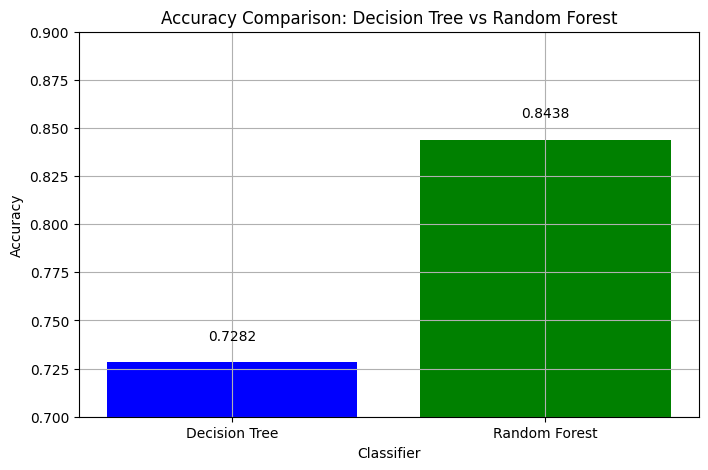

In [8]:
# Plotting accuracy comparison
labels = ['Decision Tree', 'Random Forest']
accuracy_scores = [dt_accuracy, rf_accuracy]
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Decision Tree vs Random Forest')
plt.ylim([0.7, 0.9])  # Adjust ylim based on your accuracy values
plt.grid(True)
# Adding text annotations
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
plt.show()

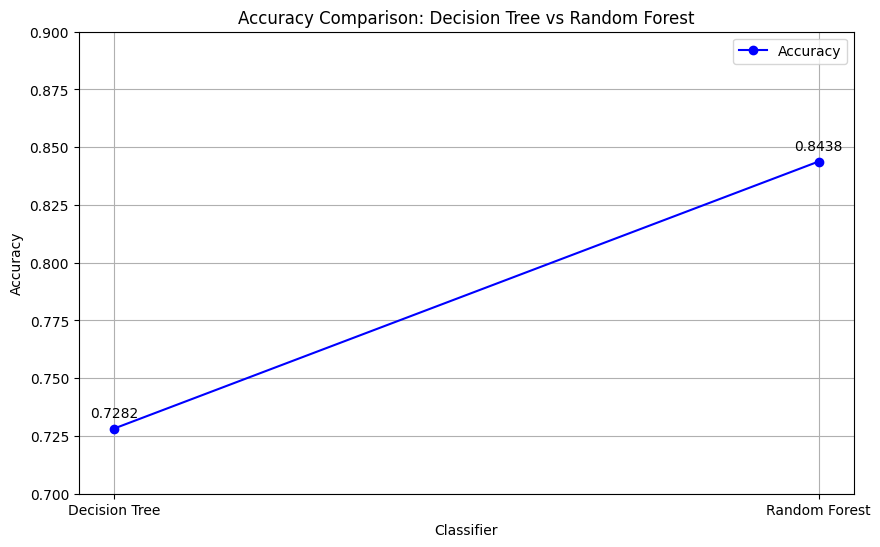

In [9]:
# Plotting accuracy comparison with a line graph
classifiers = ['Decision Tree', 'Random Forest']
accuracy_scores = [dt_accuracy, rf_accuracy]
plt.figure(figsize=(10, 6))
plt.plot(classifiers, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
# Adding data labels
for i, txt in enumerate(accuracy_scores):
    plt.annotate(f'{txt:.4f}', (classifiers[i], accuracy_scores[i] + 0.005), fontsize=10, ha='center')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Decision Tree vs Random Forest')
plt.ylim([0.7, 0.9])  # Adjust ylim based on your accuracy values
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# Function for sentiment analysis
def sent_class(ip_review):
    # Clean and preprocess the input review
    cleaned_example = clean_text(ip_review)
    example_vector = cv.transform([cleaned_example]).toarray()

    # Predict using Random Forest classifier
    rf_prediction = rf_classifier.predict(example_vector)

    # Map prediction back to sentiment label
    sentiment_mapping = {1: 'positive', 0: 'negative'}
    predicted_sentiment = sentiment_mapping[rf_prediction[0]]

    return predicted_sentiment

# Create a Gradio interface
iface = gr.Interface(fn=sent_class, inputs="text", outputs="text", title="Sentiment Analysis for Movie Reviews")

# Launch the Gradio interface with a public link
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
